# Bulls Analytics - Exploration Notebook

This notebook is for exploring Chicago Bulls data, finding insights, and creating visualizations.

## Workflow
1. **Explore** - Fetch data and see what's interesting
2. **Analyze** - Calculate trends, averages, comparisons
3. **Visualize** - Create charts and graphics

In [28]:
# Setup - Import libraries and configure
import sys
from pathlib import Path

# Add parent directory to path so we can import bulls
sys.path.insert(0, str(Path().absolute().parent))

from bulls import data, analysis, viz
from bulls.config import CURRENT_SEASON
import pandas as pd
import matplotlib.pyplot as plt

# Configure matplotlib for better display in notebooks
plt.style.use('default')
%matplotlib inline

print("✅ Bulls Analytics loaded")
print(f"📅 Season: {CURRENT_SEASON}")
print(f"📊 Ready to explore!")

✅ Bulls Analytics loaded
📅 Season: 2025-26
📊 Ready to explore!


## Quick Exploration: Last Game

Let's dive into the most recent Bulls game and find something interesting!

In [29]:
# Get the latest game and explore it
game = data.get_latest_game()
box = data.get_box_score(game['game_id'])

# === OVERVIEW ===
print("=" * 60)
print("🏀 LAST GAME OVERVIEW")
print("=" * 60)
print(f"\n📅 Date: {game['date']}")
print(f"🎯 Matchup: {game['matchup']}")
print(f"📍 Location: {'Home' if game['is_home'] else 'Away'}")
print(f"🏆 Result: {'✅ WIN' if game['result'] == 'W' else '❌ LOSS'}")

# Calculate opponent score
opponent_score = game['bulls_score'] - game['plus_minus']
print(f"📊 Final Score: Bulls {game['bulls_score']} - {opponent_score} {game['opponent']}")
print(f"📈 Point Differential: {game['plus_minus']:+.1f}")

# Team stats summary
if not box.empty:
    total_points = box['points'].sum()
    total_rebounds = box['reboundsTotal'].sum()
    total_assists = box['assists'].sum()
    total_fg_made = box['fieldGoalsMade'].sum()
    total_fg_attempted = box['fieldGoalsAttempted'].sum()
    total_fg3_made = box['threePointersMade'].sum()
    total_fg3_attempted = box['threePointersAttempted'].sum()
    
    fg_pct = (total_fg_made / total_fg_attempted * 100) if total_fg_attempted > 0 else 0
    fg3_pct = (total_fg3_made / total_fg3_attempted * 100) if total_fg3_attempted > 0 else 0
    
    print(f"\n📈 Team Stats:")
    print(f"   Total Points: {total_points}")
    print(f"   Total Rebounds: {total_rebounds}")
    print(f"   Total Assists: {total_assists}")
    print(f"   Field Goal %: {fg_pct:.1f}% ({total_fg_made}/{total_fg_attempted})")
    print(f"   3-Point %: {fg3_pct:.1f}% ({total_fg3_made}/{total_fg3_attempted})")

# Top performers
top = analysis.top_performers(box)
if top:
    print(f"\n⭐ Top 3 Performers:")
    for i, player in enumerate(top[:3], 1):
        print(f"   {i}. {player['name']}: {player['points']} PTS, {player['rebounds']} REB, {player['assists']} AST")

# === INTERESTING STAT ===
print("\n" + "=" * 60)
print("💡 INTERESTING STAT")
print("=" * 60)

if not box.empty and len(top) > 0:
    # Find the most efficient scorer (points per field goal attempt)
    efficiency_stats = []
    for player in top:
        if player['fg_attempted'] > 0:
            efficiency = player['points'] / player['fg_attempted']
            efficiency_stats.append({
                'name': player['name'],
                'points': player['points'],
                'fg_attempted': player['fg_attempted'],
                'efficiency': efficiency
            })
    
    if efficiency_stats:
        # Sort by efficiency
        efficiency_stats.sort(key=lambda x: x['efficiency'], reverse=True)
        most_efficient = efficiency_stats[0]
        
        print(f"\n🎯 Most Efficient Scorer: {most_efficient['name']}")
        print(f"   Points per Shot Attempt: {most_efficient['efficiency']:.2f}")
        print(f"   ({most_efficient['points']} points on {most_efficient['fg_attempted']} FGA)")
        
        # Compare to team average
        team_avg_efficiency = total_points / total_fg_attempted if total_fg_attempted > 0 else 0
        diff = most_efficient['efficiency'] - team_avg_efficiency
        print(f"   Team Average: {team_avg_efficiency:.2f} points per FGA")
        print(f"   Difference: {diff:+.2f} ({'+' if diff > 0 else ''}{(diff/team_avg_efficiency*100):.1f}% above team avg)")

print("\n" + "=" * 60)

🏀 LAST GAME OVERVIEW

📅 Date: 2026-01-18
🎯 Matchup: CHI vs. BKN
📍 Location: Home
🏆 Result: ✅ WIN
📊 Final Score: Bulls 124 - 102 BKN
📈 Point Differential: +22.0

📈 Team Stats:
   Total Points: 124
   Total Rebounds: 44
   Total Assists: 41
   Field Goal %: 52.1% (49/94)
   3-Point %: 43.5% (20/46)

⭐ Top 3 Performers:
   1. Coby White: 24 PTS, 4 REB, 3 AST
   2. Ayo Dosunmu: 19 PTS, 1 REB, 5 AST
   3. Nikola Vučević: 17 PTS, 11 REB, 6 AST

💡 INTERESTING STAT

🎯 Most Efficient Scorer: Coby White
   Points per Shot Attempt: 1.71
   (24 points on 14 FGA)
   Team Average: 1.32 points per FGA
   Difference: +0.40 (+30.0% above team avg)



## 1. Recent Games

Get the last N Bulls games and see what's happening.

In [30]:
# Get last 10 Bulls games
games = data.get_games(last_n=10)

# Display key columns
display(games[['GAME_DATE', 'MATCHUP', 'WL', 'PTS', 'PLUS_MINUS']])

# Quick summary
wins = (games['WL'] == 'W').sum()
losses = (games['WL'] == 'L').sum()
print(f"\n📈 Last 10 games: {wins}W - {losses}L")
print(f"📊 Average points: {games['PTS'].mean():.1f}")
print(f"📊 Average +/-: {games['PLUS_MINUS'].mean():+.1f}")

,GAME_DATE,MATCHUP,WL,PTS,PLUS_MINUS
0,2026-01-18,CHI vs. BKN,W,124,22.0
1,2026-01-16,CHI @ BKN,L,109,-3.0
2,2026-01-14,CHI vs. UTA,W,128,2.0
3,2026-01-13,CHI @ HOU,L,113,-6.0
4,2026-01-10,CHI vs. DAL,W,125,18.0
5,2026-01-07,CHI @ DET,L,93,-15.0
6,2026-01-05,CHI @ BOS,L,101,-14.0
7,2026-01-03,CHI vs. CHA,L,99,-13.0
8,2026-01-02,CHI vs. ORL,W,121,7.0
9,2025-12-31,CHI vs. NOP,W,134,16.0



📈 Last 10 games: 5W - 5L
📊 Average points: 114.7
📊 Average +/-: +1.4


## 2. Latest Game

Get the most recent game and box score.

In [31]:
# Get latest game
game = data.get_latest_game()

print(f"🏀 {game['matchup']}")
print(f"📅 {game['date']}")
print(f"🏆 Result: {game['result']}")
print(f"📊 Score: Bulls {game['bulls_score']}, Opponent {game['bulls_score'] - game['plus_minus']}")
print(f"📍 {'Home' if game['is_home'] else 'Away'} game")

# Get box score
box = data.get_box_score(game['game_id'])

# Show top performers
top = analysis.top_performers(box)
print(f"\n⭐ Top Performers:")
for i, player in enumerate(top[:5], 1):
    print(f"{i}. {player['name']}: {player['points']} PTS, {player['rebounds']} REB, {player['assists']} AST")

# Display full box score
display(box[['name', 'points', 'reboundsTotal', 'assists', 'steals', 'blocks', 'fieldGoalsMade', 'fieldGoalsAttempted']].sort_values('points', ascending=False))

🏀 CHI vs. BKN
📅 2026-01-18
🏆 Result: W
📊 Score: Bulls 124, Opponent 102
📍 Home game

⭐ Top Performers:
1. Coby White: 24 PTS, 4 REB, 3 AST
2. Ayo Dosunmu: 19 PTS, 1 REB, 5 AST
3. Nikola Vučević: 17 PTS, 11 REB, 6 AST
4. Matas Buzelis: 17 PTS, 5 REB, 5 AST
5. Jalen Smith: 12 PTS, 10 REB, 3 AST


,name,points,reboundsTotal,assists,steals,blocks,fieldGoalsMade,fieldGoalsAttempted
4,Coby White,24,4,3,2,0,8,14
5,Ayo Dosunmu,19,1,5,1,1,7,14
0,Matas Buzelis,17,5,5,0,2,6,13
2,Nikola Vučević,17,11,6,0,1,8,18
1,Jalen Smith,12,10,3,2,0,5,8
6,Kevin Huerter,11,5,6,0,0,5,9
7,Tre Jones,10,0,10,2,0,5,7
3,Isaac Okoro,9,6,2,1,1,3,6
8,Dalen Terry,3,0,0,0,0,1,2
11,Jevon Carter,2,0,0,0,0,1,3


## 3. Player Analysis

Analyze a specific player's performance over recent games.

In [32]:
# Change this to analyze different players
PLAYER_NAME = "Coby White"
LAST_N_GAMES = 15

# Get player's recent games
player_games = data.get_player_games(PLAYER_NAME, last_n=LAST_N_GAMES)

if not player_games.empty:
    # Display game log
    display(player_games[['date', 'matchup', 'result', 'points', 'rebounds', 'assists', 'fg_pct', 'fg3_pct']])
    
    # Calculate averages
    avgs = analysis.season_averages(player_games)
    print(f"\n📊 {PLAYER_NAME} - Averages over {avgs['games']} games:")
    print(f"   Points: {avgs['points']:.1f} PPG")
    print(f"   Rebounds: {avgs['rebounds']:.1f} RPG")
    print(f"   Assists: {avgs['assists']:.1f} APG")
    print(f"   FG%: {avgs['fg_pct']:.1f}%")
    print(f"   3PT%: {avgs['fg3_pct']:.1f}%")
    
    # Analyze trend
    trend = analysis.scoring_trend(player_games)
    print(f"\n📈 Scoring Trend: {trend['direction'].upper()}")
    print(f"   Recent avg: {trend['recent_avg']:.1f} PPG")
    print(f"   Overall avg: {trend['average']:.1f} PPG")
    print(f"   High: {trend['high']} | Low: {trend['low']}")
else:
    print(f"❌ No games found for {PLAYER_NAME}")

,date,matchup,result,points,rebounds,assists,fg_pct,fg3_pct
0,2026-01-18,CHI vs. BKN,W,24,4,3,57.1,63.6
1,2026-01-16,CHI @ BKN,L,17,4,4,46.7,28.6
2,2026-01-14,CHI vs. UTA,W,6,7,7,28.6,25.0
3,2026-01-10,CHI vs. DAL,W,22,4,3,60.0,28.6
4,2026-01-07,CHI @ DET,L,0,0,0,0.0,0.0
5,2026-01-05,CHI @ BOS,L,5,6,3,28.6,20.0
6,2025-12-29,CHI vs. MIN,L,0,0,2,0.0,0.0
7,2025-12-27,CHI vs. MIL,L,16,2,1,50.0,50.0
8,2025-12-26,CHI vs. PHI,W,13,7,6,33.3,16.7
9,2025-12-23,CHI @ ATL,W,24,0,4,53.8,50.0



📊 Coby White - Averages over 15 games:
   Points: 15.1 PPG
   Rebounds: 3.8 RPG
   Assists: 3.8 APG
   FG%: 39.2%
   3PT%: 29.4%

📈 Scoring Trend: UP
   Recent avg: 13.8 PPG
   Overall avg: 15.1 PPG
   High: 25 | Low: 0


## 4. Visualizations

Create charts to visualize player performance and trends.

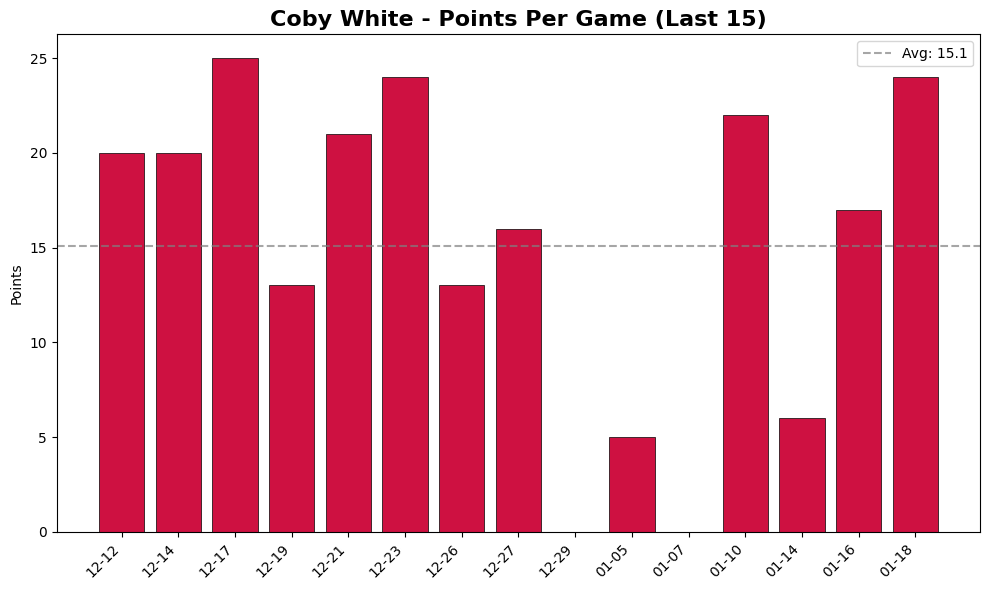

In [33]:
# Bar chart of scoring
if not player_games.empty:
    fig = viz.bar_chart(
        player_games,
        x='date',
        y='points',
        title=f"{PLAYER_NAME} - Points Per Game (Last {LAST_N_GAMES})"
    )
    plt.show()
else:
    print("No data to visualize. Run the player analysis cell first.")

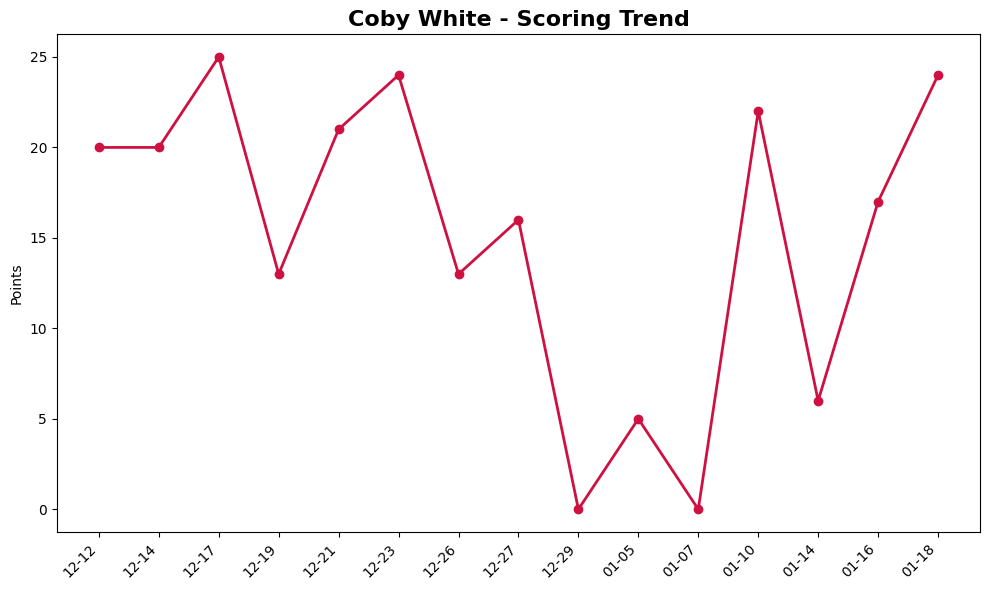

In [34]:
# Line chart showing trend
if not player_games.empty:
    fig = viz.line_chart(
        player_games,
        x='date',
        y='points',
        title=f"{PLAYER_NAME} - Scoring Trend"
    )
    plt.show()
else:
    print("No data to visualize. Run the player analysis cell first.")

## 5. Create Visualizations

When you've found an interesting insight, create visualizations to share.

In [35]:
# Example: Create additional visualizations
# Customize these based on your analysis

# You can create multiple chart types to explore different aspects
# of the data and find interesting insights

## Tips

- **Explore first**: Use the data fetching cells to see what's interesting
- **Ask questions**: "How has player X been performing?" "What's the trend?"
- **Visualize**: Create charts to see patterns
- **Find the story**: Look for unique angles (clutch performance, trends, comparisons)

## Next Steps

1. Try different players
2. Compare multiple players
3. Look for interesting patterns (home vs away, vs specific teams, etc.)
4. Create custom visualizations
5. Experiment with different chart types to find insights

---

## Single-Game Deep Dive

Analyze the most recent Bulls game in depth: top contributors, scoring distribution, and vs-average comparisons.

In [36]:
# === SINGLE-GAME DEEP DIVE ===
# Fetch fresh data for the latest game
game = data.get_latest_game()
box = data.get_box_score(game['game_id'])
top = analysis.top_performers(box)

print("=" * 60)
print(f"GAME ANALYSIS: {game['matchup']} ({game['date']})")
print(f"Result: {game['result']} | Final: Bulls {game['bulls_score']}")
print("=" * 60)

# Create DataFrame for top 3 contributors
top_3 = pd.DataFrame(top[:3])
top_3['total_contribution'] = top_3['points'] + top_3['rebounds'] + top_3['assists']

print("\nTop 3 Contributors:")
for i, player in enumerate(top[:3], 1):
    print(f"  {i}. {player['name']}: {player['points']} PTS, {player['rebounds']} REB, {player['assists']} AST")

GAME ANALYSIS: CHI vs. BKN (2026-01-18)
Result: W | Final: Bulls 124

Top 3 Contributors:
  1. Coby White: 24 PTS, 4 REB, 3 AST
  2. Ayo Dosunmu: 19 PTS, 1 REB, 5 AST
  3. Nikola Vučević: 17 PTS, 11 REB, 6 AST


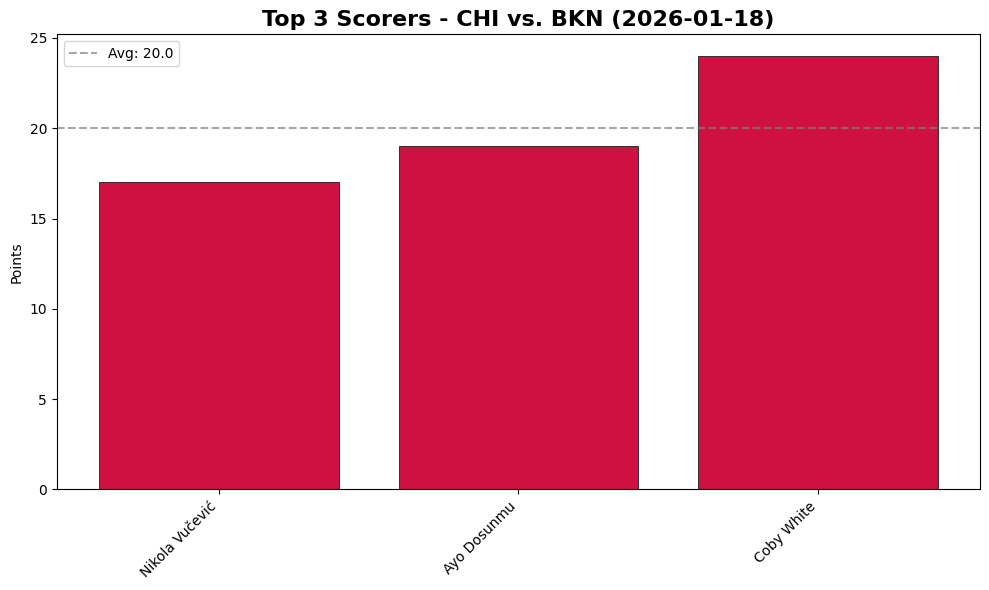

In [37]:
# Bar Chart: Top 3 Contributors (Points)
if not top_3.empty:
    fig = viz.bar_chart(
        top_3,
        x='name',
        y='points',
        title=f"Top 3 Scorers - {game['matchup']} ({game['date']})",
        highlight_last=False
    )
    plt.show()
else:
    print("No box score data available")

In [38]:
# Scoring Distribution Analysis: Star-Driven vs Balanced?
if not box.empty:
    total_points = box['points'].sum()
    top_scorer_pts = top[0]['points'] if top else 0
    top_3_pts = sum(p['points'] for p in top[:3]) if len(top) >= 3 else 0
    
    # Calculate percentages
    top_scorer_pct = (top_scorer_pts / total_points * 100) if total_points > 0 else 0
    top_3_pct = (top_3_pts / total_points * 100) if total_points > 0 else 0
    
    print("=" * 60)
    print("SCORING DISTRIBUTION ANALYSIS")
    print("=" * 60)
    print(f"\nTotal Team Points: {total_points}")
    print(f"Top Scorer ({top[0]['name']}): {top_scorer_pts} pts ({top_scorer_pct:.1f}%)")
    print(f"Top 3 Combined: {top_3_pts} pts ({top_3_pct:.1f}%)")
    
    # Determine if star-driven or balanced
    players_in_double_figures = len([p for p in top if p['points'] >= 10])
    
    print(f"\nPlayers in Double Figures: {players_in_double_figures}")
    
    if top_scorer_pct >= 30:
        verdict = "STAR-DRIVEN WIN" if game['result'] == 'W' else "STAR-DRIVEN EFFORT"
        print(f"\nVerdict: {verdict}")
        print(f"   {top[0]['name']} carried the load with {top_scorer_pct:.1f}% of points")
    elif players_in_double_figures >= 5:
        verdict = "BALANCED ATTACK"
        print(f"\nVerdict: {verdict}")
        print(f"   {players_in_double_figures} players scored 10+ points")
    else:
        print(f"\nVerdict: MODERATE DISTRIBUTION")
        print(f"   Top scorer at {top_scorer_pct:.1f}%, {players_in_double_figures} in double figures")
else:
    print("No box score data available")

SCORING DISTRIBUTION ANALYSIS

Total Team Points: 124
Top Scorer (Coby White): 24 pts (19.4%)
Top 3 Combined: 60 pts (48.4%)

Players in Double Figures: 7

Verdict: BALANCED ATTACK
   7 players scored 10+ points


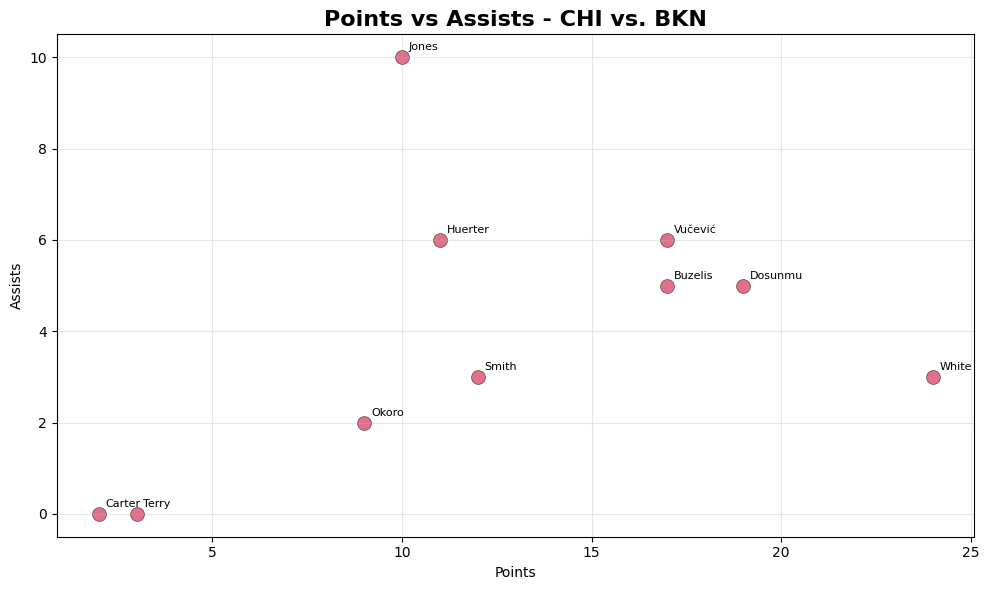

In [39]:
# Scatter Plot: Points vs Assists (who contributed in multiple ways?)
if not box.empty:
    # Filter to players who actually played
    active_players = box[box['points'] > 0].copy()
    
    fig = viz.scatter_plot(
        active_players,
        x='points',
        y='assists',
        title=f"Points vs Assists - {game['matchup']}",
    )
    
    # Add player names as labels
    ax = fig.axes[0]
    for _, player in active_players.iterrows():
        ax.annotate(
            player['name'].split()[-1],  # Last name only
            (player['points'], player['assists']),
            textcoords="offset points",
            xytext=(5, 5),
            fontsize=8
        )
    plt.show()
else:
    print("No data to visualize")

In [40]:
# Who Exceeded Expectations? Compare top scorer to their season average
if top:
    top_scorer = top[0]
    top_scorer_name = top_scorer['name']
    
    print("=" * 60)
    print(f"VS-AVERAGE ANALYSIS: {top_scorer_name}")
    print("=" * 60)
    
    # Get top scorer's recent games for averages
    try:
        player_games = data.get_player_games(top_scorer_name, last_n=15)
        
        if not player_games.empty:
            avgs = analysis.season_averages(player_games)
            
            # Get this game's stats
            this_game = {
                'points': top_scorer['points'],
                'rebounds': top_scorer['rebounds'],
                'assists': top_scorer['assists']
            }
            
            # Calculate differences
            diff = analysis.vs_average(this_game, avgs)
            
            print(f"\nThis Game vs Season Average (last {avgs['games']} games):")
            print(f"  Points:   {this_game['points']:>3} vs {avgs['points']:.1f} avg ({diff['points']:+.1f})")
            print(f"  Rebounds: {this_game['rebounds']:>3} vs {avgs['rebounds']:.1f} avg ({diff['rebounds']:+.1f})")
            print(f"  Assists:  {this_game['assists']:>3} vs {avgs['assists']:.1f} avg ({diff['assists']:+.1f})")
            
            # Verdict
            if diff['points'] > 5:
                print(f"\n** {top_scorer_name} EXCEEDED EXPECTATIONS (+{diff['points']:.1f} pts) **")
            elif diff['points'] < -5:
                print(f"\n   {top_scorer_name} had an off night ({diff['points']:.1f} pts below avg)")
            else:
                print(f"\n   {top_scorer_name} played to their average")
        else:
            print(f"Could not fetch game log for {top_scorer_name}")
    except Exception as e:
        print(f"Error fetching player data: {e}")
else:
    print("No performers data available")

VS-AVERAGE ANALYSIS: Coby White

This Game vs Season Average (last 15 games):
  Points:    24 vs 15.1 avg (+8.9)
  Rebounds:   4 vs 3.8 avg (+0.2)
  Assists:    3 vs 3.8 avg (-0.8)

** Coby White EXCEEDED EXPECTATIONS (+8.9 pts) **


---

## Post-Game Content Ideas

Find standout stats and angles for social media and articles.

In [41]:
# STAT OF THE NIGHT - Find the most impressive individual stat
print("=" * 60)
print("STAT OF THE NIGHT")
print("=" * 60)

if not box.empty:
    standout_stats = []
    
    for p in top:
        # Check for standout performances
        if p['points'] >= 25:
            standout_stats.append(f"{p['name']} scored {p['points']} points")
        if p['rebounds'] >= 12:
            standout_stats.append(f"{p['name']} grabbed {p['rebounds']} rebounds")
        if p['assists'] >= 10:
            standout_stats.append(f"{p['name']} dished {p['assists']} assists")
        if p['steals'] >= 4:
            standout_stats.append(f"{p['name']} had {p['steals']} steals")
        if p['blocks'] >= 3:
            standout_stats.append(f"{p['name']} blocked {p['blocks']} shots")
        
        # Check for double-double
        stats = [p['points'], p['rebounds'], p['assists']]
        double_digits = sum(1 for s in stats if s >= 10)
        if double_digits >= 2:
            standout_stats.append(f"{p['name']} recorded a DOUBLE-DOUBLE ({p['points']} pts, {p['rebounds']} reb, {p['assists']} ast)")
    
    # Check for efficiency leaders
    for p in top[:5]:
        if p['fg_attempted'] >= 5:
            fg_pct = (p['fg_made'] / p['fg_attempted'] * 100)
            if fg_pct >= 60:
                standout_stats.append(f"{p['name']} shot {fg_pct:.1f}% from the field ({p['fg_made']}/{p['fg_attempted']})")
    
    if standout_stats:
        print("\nStandout Stats:")
        for i, stat in enumerate(standout_stats, 1):
            print(f"  {i}. {stat}")
        
        # Pick the "Stat of the Night"
        print(f"\n*** STAT OF THE NIGHT ***")
        print(f"  {standout_stats[0]}")
    else:
        # Fall back to top scorer
        print(f"\n  {top[0]['name']}: {top[0]['points']} PTS, {top[0]['rebounds']} REB, {top[0]['assists']} AST")
else:
    print("No data available")

STAT OF THE NIGHT

Standout Stats:
  1. Nikola Vučević recorded a DOUBLE-DOUBLE (17 pts, 11 reb, 6 ast)
  2. Jalen Smith recorded a DOUBLE-DOUBLE (12 pts, 10 reb, 3 ast)
  3. Tre Jones dished 10 assists
  4. Tre Jones recorded a DOUBLE-DOUBLE (10 pts, 0 reb, 10 ast)
  5. Jalen Smith shot 62.5% from the field (5/8)

*** STAT OF THE NIGHT ***
  Nikola Vučević recorded a DOUBLE-DOUBLE (17 pts, 11 reb, 6 ast)


## Shot Chart Exploration

Let's explore the new shot chart data! We can look at:
1. **Team shot chart** - All Bulls shots combined
2. **Coby White's shot chart** - Individual player analysis

Shot charts show where shots are taken on the court and whether they were made or missed.

In [48]:
# Get Bulls team shot chart data
print("Fetching Bulls team shot chart data...")
team_shots = data.get_team_shots(season=CURRENT_SEASON)  # Last 10 games

if not team_shots.empty:
    print(f"\n✅ Fetched {len(team_shots)} team shots from this season")
    print(f"\n📊 Team Shot Statistics:")
    print(f"   Total Shots: {len(team_shots)}")
    print(f"   Made: {team_shots['shot_made'].sum()}")
    print(f"   Missed: {(~team_shots['shot_made']).sum()}")
    print(f"   FG%: {team_shots['shot_made'].mean() * 100:.1f}%")
    print(f"\n   Shot Type Breakdown:")
    print(f"   2PT: {len(team_shots[team_shots['shot_type'] == '2PT'])} ({team_shots[team_shots['shot_type'] == '2PT']['shot_made'].mean() * 100:.1f}%)")
    print(f"   3PT: {len(team_shots[team_shots['shot_type'] == '3PT'])} ({team_shots[team_shots['shot_type'] == '3PT']['shot_made'].mean() * 100:.1f}%)")
    
    print(f"\n   Shot Zones:")
    zone_stats = team_shots.groupby('shot_zone').agg({
        'shot_made': ['count', 'sum', 'mean']
    }).round(3)
    zone_stats.columns = ['Attempts', 'Makes', 'FG%']
    zone_stats['FG%'] = zone_stats['FG%'] * 100
    print(zone_stats.sort_values('Attempts', ascending=False))
else:
    print("❌ No team shot data available")

Fetching Bulls team shot chart data...

✅ Fetched 3815 team shots from this season

📊 Team Shot Statistics:
   Total Shots: 3815
   Made: 1810
   Missed: 2005
   FG%: 47.4%

   Shot Type Breakdown:
   2PT: 2168 (56.1%)
   3PT: 1647 (36.0%)

   Shot Zones:
                       Attempts  Makes    FG%
shot_zone                                    
Restricted Area            1356    860   63.4
Above the Break 3          1194    411   34.4
In The Paint (Non-RA)       638    289   45.3
Left Corner 3               238     87   36.6
Right Corner 3              215     94   43.7
Mid-Range                   173     68   39.3
Backcourt                     1      1  100.0


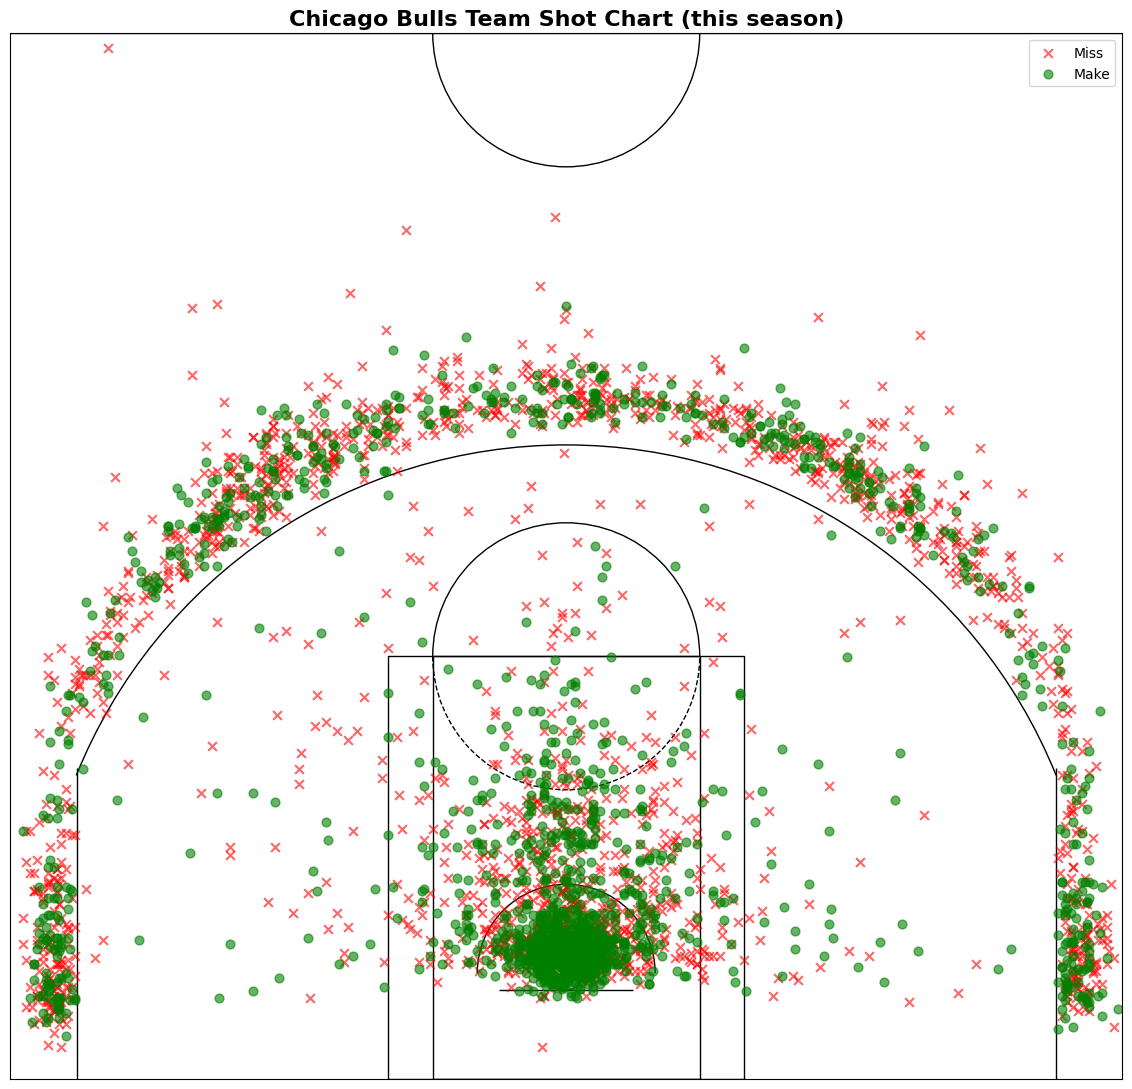


📈 Shot Chart Heatmap (showing FG% by zone):


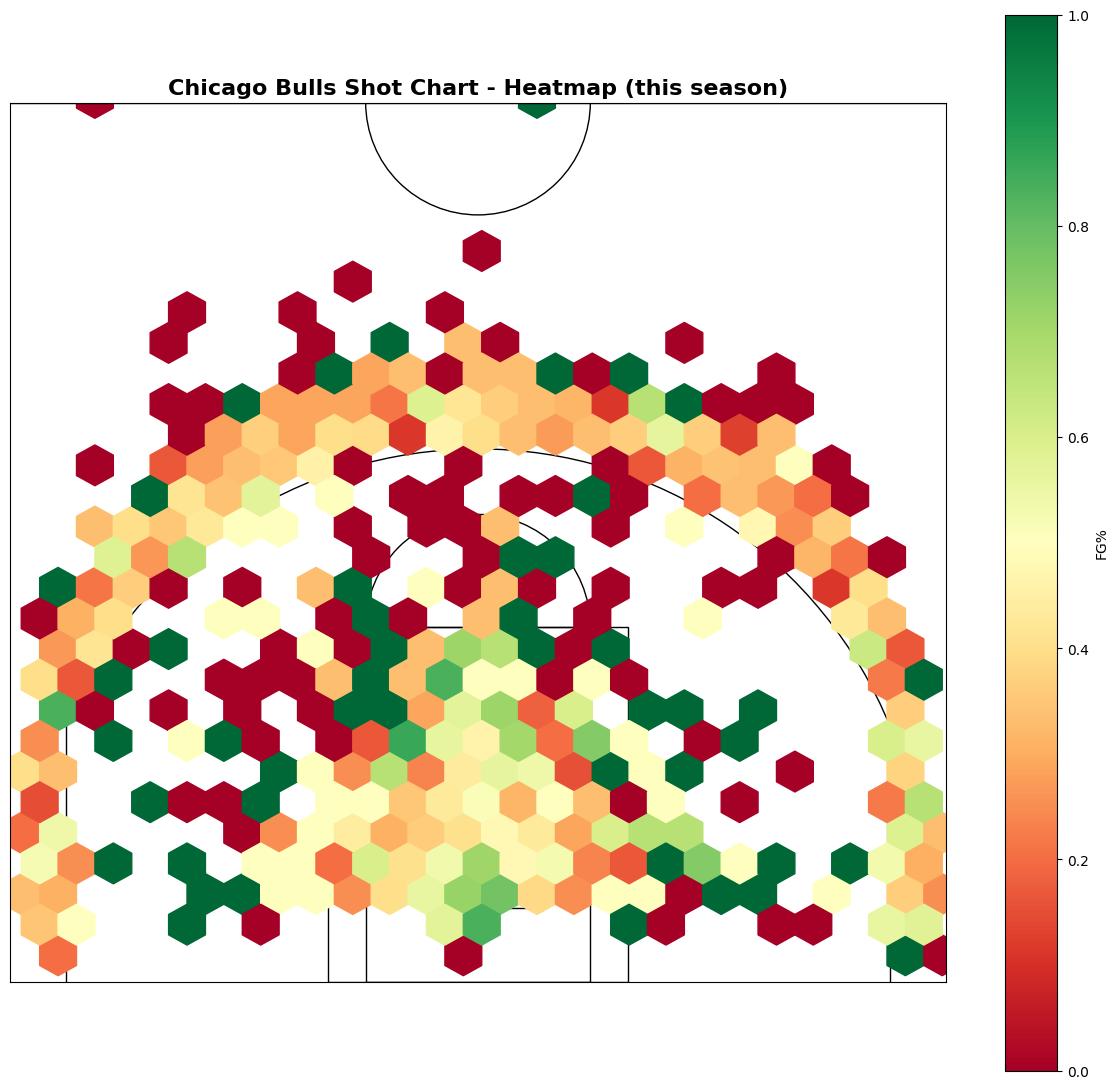

In [49]:
# Visualize Bulls team shot chart
if not team_shots.empty:
    fig = viz.shot_chart(team_shots, title="Chicago Bulls Team Shot Chart (this season)")
    plt.show()
    
    # Also show heatmap version
    print("\n📈 Shot Chart Heatmap (showing FG% by zone):")
    fig2 = viz.shot_chart(team_shots, show_zones=True, title="Chicago Bulls Shot Chart - Heatmap (this season)")
    plt.show()
else:
    print("No team shot data to visualize")

In [44]:
# Get Coby White's shot chart data
# Coby White's player ID: 1629632
COBY_PLAYER_ID = 1629632

print("Fetching Coby White's shot chart data...")
coby_shots = data.get_player_shots(COBY_PLAYER_ID, last_n_games=10)

if not coby_shots.empty:
    print(f"\n✅ Fetched {len(coby_shots)} shots from Coby White (last 10 games)")
    print(f"\n📊 Coby White Shot Statistics:")
    print(f"   Total Shots: {len(coby_shots)}")
    print(f"   Made: {coby_shots['shot_made'].sum()}")
    print(f"   Missed: {(~coby_shots['shot_made']).sum()}")
    print(f"   FG%: {coby_shots['shot_made'].mean() * 100:.1f}%")
    print(f"\n   Shot Type Breakdown:")
    print(f"   2PT: {len(coby_shots[coby_shots['shot_type'] == '2PT'])} ({coby_shots[coby_shots['shot_type'] == '2PT']['shot_made'].mean() * 100:.1f}%)")
    print(f"   3PT: {len(coby_shots[coby_shots['shot_type'] == '3PT'])} ({coby_shots[coby_shots['shot_type'] == '3PT']['shot_made'].mean() * 100:.1f}%)")
    
    print(f"\n   Shot Zones:")
    coby_zone_stats = coby_shots.groupby('shot_zone').agg({
        'shot_made': ['count', 'sum', 'mean']
    }).round(3)
    coby_zone_stats.columns = ['Attempts', 'Makes', 'FG%']
    coby_zone_stats['FG%'] = coby_zone_stats['FG%'] * 100
    print(coby_zone_stats.sort_values('Attempts', ascending=False))
    
    print(f"\n   Average Shot Distance: {coby_shots['shot_distance'].mean():.1f} feet")
else:
    print("❌ No shot data available for Coby White")

Fetching Coby White's shot chart data...

✅ Fetched 58 shots from Coby White (last 10 games)

📊 Coby White Shot Statistics:
   Total Shots: 58
   Made: 28
   Missed: 30
   FG%: 48.3%

   Shot Type Breakdown:
   2PT: 24 (62.5%)
   3PT: 34 (38.2%)

   Shot Zones:
                       Attempts  Makes   FG%
shot_zone                                   
Above the Break 3            30     12  40.0
Restricted Area              13      9  69.2
In The Paint (Non-RA)         8      5  62.5
Left Corner 3                 4      1  25.0
Mid-Range                     3      1  33.3

   Average Shot Distance: 17.1 feet


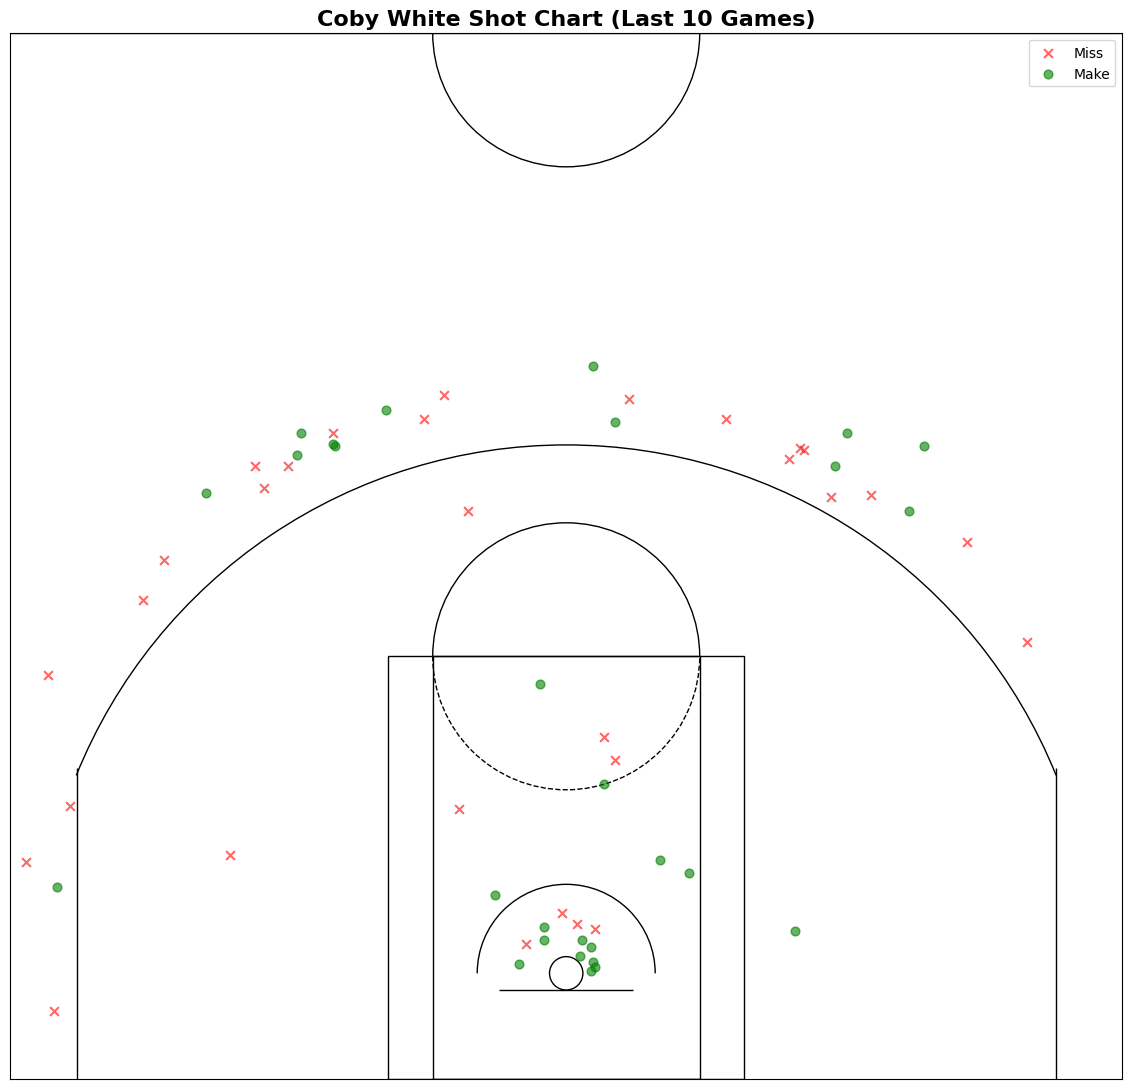


📈 Coby White Shot Chart Heatmap:


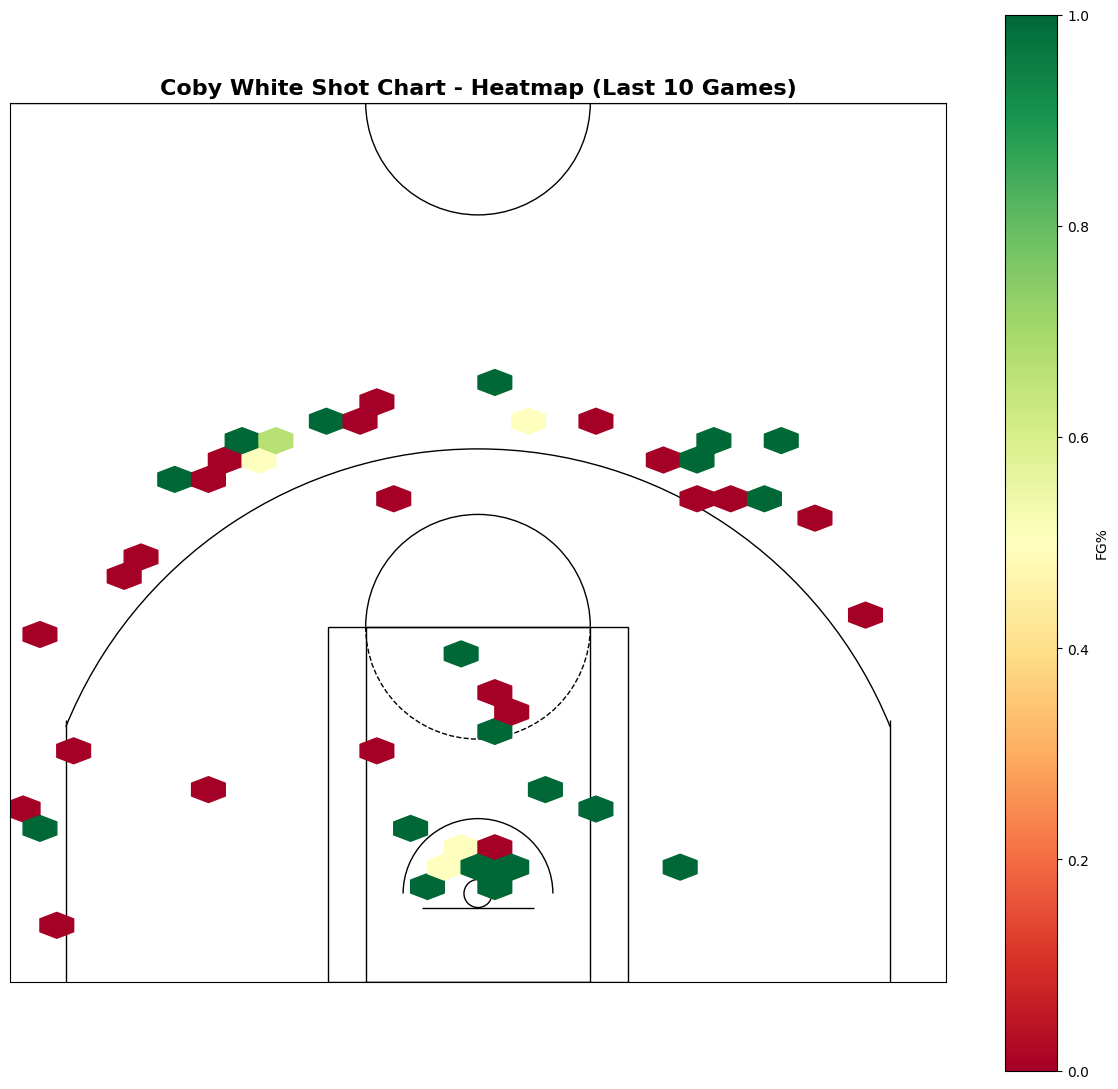

In [45]:
# Visualize Coby White's shot chart
if not coby_shots.empty:
    fig = viz.shot_chart(coby_shots, title="Coby White Shot Chart (Last 10 Games)")
    plt.show()
    
    # Also show heatmap version
    print("\n📈 Coby White Shot Chart Heatmap:")
    fig2 = viz.shot_chart(coby_shots, show_zones=True, title="Coby White Shot Chart - Heatmap (Last 10 Games)")
    plt.show()
else:
    print("No Coby White shot data to visualize")

In [46]:
# Compare Coby White vs Team averages
if not team_shots.empty and not coby_shots.empty:
    print("=" * 60)
    print("COBY WHITE vs TEAM COMPARISON")
    print("=" * 60)
    
    # Overall FG%
    team_fg = team_shots['shot_made'].mean() * 100
    coby_fg = coby_shots['shot_made'].mean() * 100
    
    print(f"\n📊 Overall Field Goal %:")
    print(f"   Team: {team_fg:.1f}%")
    print(f"   Coby: {coby_fg:.1f}%")
    print(f"   Difference: {coby_fg - team_fg:+.1f}%")
    
    # 3PT%
    team_3pt = team_shots[team_shots['shot_type'] == '3PT']['shot_made'].mean() * 100
    coby_3pt = coby_shots[coby_shots['shot_type'] == '3PT']['shot_made'].mean() * 100
    
    print(f"\n🏀 3-Point %:")
    print(f"   Team: {team_3pt:.1f}%")
    print(f"   Coby: {coby_3pt:.1f}%")
    print(f"   Difference: {coby_3pt - team_3pt:+.1f}%")
    
    # 2PT%
    team_2pt = team_shots[team_shots['shot_type'] == '2PT']['shot_made'].mean() * 100
    coby_2pt = coby_shots[coby_shots['shot_type'] == '2PT']['shot_made'].mean() * 100
    
    print(f"\n🎯 2-Point %:")
    print(f"   Team: {team_2pt:.1f}%")
    print(f"   Coby: {coby_2pt:.1f}%")
    print(f"   Difference: {coby_2pt - team_2pt:+.1f}%")
    
    # Average shot distance
    team_avg_dist = team_shots['shot_distance'].mean()
    coby_avg_dist = coby_shots['shot_distance'].mean()
    
    print(f"\n📏 Average Shot Distance:")
    print(f"   Team: {team_avg_dist:.1f} feet")
    print(f"   Coby: {coby_avg_dist:.1f} feet")
    print(f"   Difference: {coby_avg_dist - team_avg_dist:+.1f} feet")
    
else:
    print("Need both team and Coby shot data for comparison")

COBY WHITE vs TEAM COMPARISON

📊 Overall Field Goal %:
   Team: 47.4%
   Coby: 48.3%
   Difference: +0.8%

🏀 3-Point %:
   Team: 36.0%
   Coby: 38.2%
   Difference: +2.2%

🎯 2-Point %:
   Team: 56.1%
   Coby: 62.5%
   Difference: +6.4%

📏 Average Shot Distance:
   Team: 13.0 feet
   Coby: 17.1 feet
   Difference: +4.1 feet


In [47]:
# Above/Below Average Framing for Key Players
print("=" * 60)
print("ABOVE/BELOW AVERAGE FRAMING")
print("=" * 60)
print("\nComparing top 3 performers to their season averages:\n")

if top:
    for player in top[:3]:
        player_name = player['name']
        try:
            pg = data.get_player_games(player_name, last_n=15)
            if not pg.empty:
                avgs = analysis.season_averages(pg)
                diff = analysis.vs_average(
                    {'points': player['points'], 'rebounds': player['rebounds'], 'assists': player['assists']},
                    avgs
                )
                
                # Determine overall performance
                total_diff = diff['points'] + diff['rebounds'] + diff['assists']
                
                if total_diff > 5:
                    emoji = "^"  # Above average
                elif total_diff < -5:
                    emoji = "v"  # Below average
                else:
                    emoji = "="  # Average
                
                print(f"{emoji} {player_name}")
                print(f"   PTS: {player['points']} ({diff['points']:+.1f} vs avg)")
                print(f"   REB: {player['rebounds']} ({diff['rebounds']:+.1f} vs avg)")
                print(f"   AST: {player['assists']} ({diff['assists']:+.1f} vs avg)")
                print()
        except Exception as e:
            print(f"Could not analyze {player_name}: {e}")
else:
    print("No performers data")

ABOVE/BELOW AVERAGE FRAMING

Comparing top 3 performers to their season averages:

^ Coby White
   PTS: 24 (+8.9 vs avg)
   REB: 4 (+0.2 vs avg)
   AST: 3 (-0.8 vs avg)

= Ayo Dosunmu
   PTS: 19 (+4.9 vs avg)
   REB: 1 (-1.7 vs avg)
   AST: 5 (+0.9 vs avg)

= Nikola Vučević
   PTS: 17 (-1.5 vs avg)
   REB: 11 (+2.1 vs avg)
   AST: 6 (+1.5 vs avg)

